In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Camelia\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Reading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Camelia\Documents\Python\Machine Learning\Cafe Sales\dirty_cafe_sales.csv')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## Collecting Information

In [3]:
df.shape

(10000, 8)

Searching for null values

In [4]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


* After inspecting the dataset using df.info(), it was observed that all columns, both numerical and non-numerical, are stored as the "object" data type.
* This is not typical, as numerical columns (e.g., integers or floats) should ideally have data types such as int64, float64, etc., and non-numerical columns (e.g., categorical or text data) should have data types like object, category, or string.

Making another copy of the dataframe 'df' as 'dt' in order to compare the two dataframes later

In [6]:
dt = df.copy()
dt

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


Upon reviewing the dataset, it was observed that in addition to missing values, certain entries were labeled as 'error' and 'unknown'.
These values were treated as missing data and replaced with NaN to ensure consistent handling of missing values.

# Data Cleaning

### Replace "ERROR" and "unknown" with NaN

In [7]:
dt.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)

### Convert 'Price Per Unit' to numeric values, invalid parsing will be converted to NaN

In [8]:
dt['Price Per Unit'] = pd.to_numeric(dt['Price Per Unit'], errors='coerce')
dt['Quantity'] = pd.to_numeric(dt['Quantity'], errors='coerce')
dt['Total Spent'] = pd.to_numeric(dt['Total Spent'], errors='coerce')

In [9]:
dt['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

In [10]:
dt[dt['Item']=="Coffee"]["Price Per Unit"].mean()

2.0

In [11]:
dt[dt['Item']=="Juice"]["Price Per Unit"].mean()

3.0

In [12]:
dt[dt['Item']=="Salad"]["Price Per Unit"].mean()

5.0

In [13]:
dt[dt['Item']=="Smoothie"]["Price Per Unit"].mean()

4.0

In [14]:
dt[dt['Item']=="Cake"]["Price Per Unit"].mean()

3.0

In [15]:
dt[dt['Item']=="Tea"]["Price Per Unit"].mean()

1.5

In [16]:
dt[dt['Item']=="Cookie"]["Price Per Unit"].mean()

1.0

### Filling the values of Price per Unit

Check and replace NaN values with 1.0 where Item is "Cookie"

In [17]:
dt.loc[(dt["Item"] == "Juice") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 3.0
dt.loc[(dt["Item"] == "Coffee") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 2.0
dt.loc[(dt["Item"] == "Salad") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 5.0
dt.loc[(dt["Item"] == "Cake") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 3.0
dt.loc[(dt["Item"] == "Sandwich") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 4.0
dt.loc[(dt["Item"] == "Smoothie") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 4.0
dt.loc[(dt["Item"] == "Cookie") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 1.0
dt.loc[(dt["Item"] == "Tea") & (dt["Price Per Unit"].isna()), "Price Per Unit"] = 1.5

In [18]:
dt.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit        54
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### Filling the missing values of Total Spent

In [19]:
# Function to calculate total spent
def calculate_total_spent(row):
    if pd.notnull(row['Quantity']) and pd.notnull(row['Price Per Unit']) and pd.isnull(row['Total Spent']):
        return row['Quantity'] * row['Price Per Unit']
    else:
        return row['Total Spent']

# Apply the function to calculate 'Total Spent'
dt['Total Spent'] = dt.apply(calculate_total_spent, axis=1)

### Filling missing values of Quantity

In [20]:
def calculate_quantity(x):
    if pd.notnull(x['Total Spent']) and pd.notnull(x["Price Per Unit"]) and pd.isnull(x['Quantity']):
        return x['Total Spent']/x["Price Per Unit"]
    else:
        return x['Quantity']
dt['Quantity'] = dt.apply(calculate_quantity,axis=1)

### Filling price per unit

In [21]:
def price(data):
    if pd.notnull(data['Quantity']) and pd.notnull(data['Total Spent']) and pd.isnull(data['Price Per Unit']):
        return data['Total Spent']/data['Quantity']
    else:
        return data['Price Per Unit']
dt['Price Per Unit'] = dt.apply(price,axis=1)

### Filling missing Item values

In [22]:
dt[dt['Item'].isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,NaN,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
14,TXN_8915701,NaN,2.0,1.5,3.0,NaN,In-store,2023-03-21
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,NaN,2023-06-02
31,TXN_8927252,NaN,2.0,1.0,2.0,Credit Card,NaN,2023-11-06
...,...,...,...,...,...,...,...,...
9951,TXN_4122925,NaN,4.0,1.0,4.0,NaN,Takeaway,2023-10-20
9958,TXN_4125474,NaN,2.0,5.0,10.0,Credit Card,In-store,2023-08-02
9981,TXN_4583012,NaN,5.0,4.0,20.0,Digital Wallet,NaN,2023-02-27
9994,TXN_7851634,NaN,4.0,4.0,16.0,NaN,NaN,2023-01-08


In [23]:
def item_fill(qty):
    if pd.isnull(qty['Item']) and qty['Price Per Unit'] == 1.0:
        return "Cookie"
    elif pd.isnull(qty['Item']) and qty['Price Per Unit'] == 4.0:
        return "Sandwich"
    elif pd.isnull(qty['Item']) and qty['Price Per Unit'] == 2.0:
        return "Coffee"
    elif pd.isnull(qty['Item']) and qty['Price Per Unit'] == 5.0:
        return "Salad"
    elif pd.isnull(qty['Item']) and qty['Price Per Unit'] == 1.5:
        return "Tea"
    elif pd.isnull(qty['Item']) and qty['Price Per Unit'] == 3:
        return "Juice"
    else:
        return qty['Item']
    
dt['Item'] = dt.apply(item_fill,axis=1)

In [24]:
dt['Item'].value_counts()

Item
Juice       1418
Sandwich    1358
Coffee      1291
Salad       1272
Cookie      1213
Tea         1207
Cake        1139
Smoothie    1096
Name: count, dtype: int64

### Dropping null values from Item column

In [25]:
dt.isnull().sum()

Transaction ID         0
Item                   6
Quantity              23
Price Per Unit         6
Total Spent           23
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [26]:
dt.dropna(subset='Item',inplace=True)

### Filling in the remaining values of Quantity

In [27]:
dt['Quantity'].mean().round()

3.0

In [28]:
dt['Quantity'] = dt['Quantity'].fillna(dt['Quantity'].mean().round())

The mean represents the "average" value of the data and can serve as a reasonable estimate for missing values, especially when the data is fairly symmetric or not heavily skewed.Filling missing values with the mean avoids distorting the overall distribution of your data. It's a way of maintaining the central tendency without introducing values that could be too high or too low, which could happen with methods like using the median or mode.

In [29]:
# Recalling the calculate_total_spent() function
dt['Total Spent'] = dt.apply(calculate_total_spent, axis=1)

In [30]:
dt['Location'].value_counts()

Location
Takeaway    3022
In-store    3014
Name: count, dtype: int64

In [31]:
dt['Payment Method'].value_counts()

Payment Method
Digital Wallet    2290
Credit Card       2271
Cash              2258
Name: count, dtype: int64

Filling the missing values dt['Location'] and dt['Payment Method'] with the mode

In [32]:
dt['Location'] = dt['Location'].fillna(dt['Location'].mode()[0])
dt['Payment Method'] = dt['Payment Method'].fillna(dt['Payment Method'].mode()[0])

Filling missing dates with the last known valid date (by assumption)

In [33]:
dt['Transaction Date'] = dt['Transaction Date'].ffill() 

In [34]:
dt.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

### Convert 'Transaction Date' to datetime format

In [35]:
dt['Transaction Date'] = pd.to_datetime(dt['Transaction Date'])

In [36]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9994 non-null   object        
 1   Item              9994 non-null   object        
 2   Quantity          9994 non-null   float64       
 3   Price Per Unit    9994 non-null   float64       
 4   Total Spent       9994 non-null   float64       
 5   Payment Method    9994 non-null   object        
 6   Location          9994 non-null   object        
 7   Transaction Date  9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 702.7+ KB


In [39]:
dt

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-12-02


# Analysis

Total number of transactions

In [40]:
num_transactions = dt['Transaction ID'].nunique()
num_transactions

9994

Total Revenue Generated

In [87]:
total_revenue = dt['Total Spent'].sum()
total_revenue

89220.5

Monthly Sales Over Time

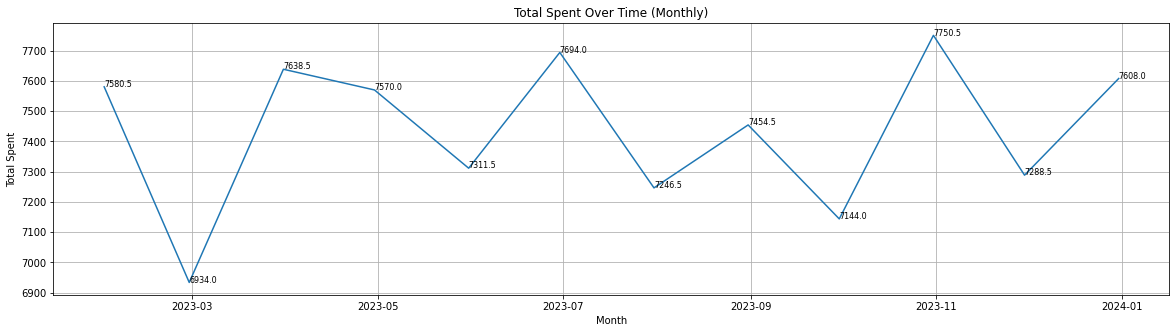

In [43]:
# Resample the data by month (you can change 'M' to 'D' for day, 'W' for week)
dt.set_index('Transaction Date', inplace=True)
monthly_data = dt.resample('M').sum()  # Sum of 'Total Spent' per month

# Plot the resampled data
plt.figure(figsize = (20,5))
plt.plot(monthly_data.index, monthly_data['Total Spent'])

# Add labels
for i, row in monthly_data.iterrows(): #This is a Pandas function that allows you to iterate over each row
    plt.text(row.name, row['Total Spent'], row["Total Spent"], fontsize=8)
    
plt.title('Total Spent Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()


Total Income by Location

In [54]:
# Grouping by 'Location' and summing 'Total Spent'
location_totals = dt.groupby('Location')['Total Spent'].sum()

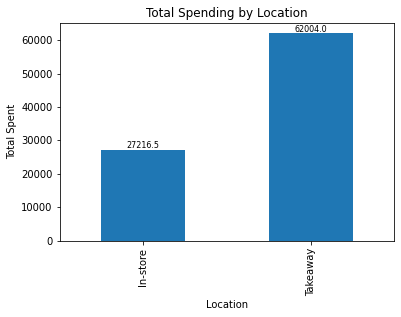

In [57]:
# Plotting the bar chart
location_totals.plot(kind='bar')

# Adding the text to each bar
for i, value in enumerate(location_totals):
    plt.text(i, value, str(value), fontsize=8, ha='center', va='bottom')

# Display the plot
plt.xlabel('Location')
plt.ylabel('Total Spent')
plt.title('Total Spending by Location')
plt.show()

Top items by revenue

In [71]:
sort_items = dt.groupby('Item')[['Total Spent', 'Quantity']].sum().sort_values('Total Spent', ascending=False)
sort_items

,Total Spent,Quantity
Item,,
Salad,19125.0,3825.0
Sandwich,16580.0,4145.0
Smoothie,13368.0,3342.0
Juice,12813.0,4271.0
Cake,10413.0,3471.0
Coffee,7838.0,3919.0
Tea,5479.5,3653.0
Cookie,3604.0,3604.0


Number of transactions per payment method (Pie Chart)

In [79]:
payment_method = dt['Payment Method'].value_counts()

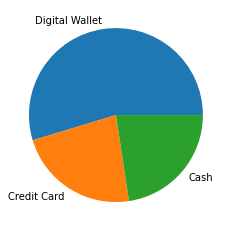

In [81]:
plt.pie(payment_method.values, labels=payment_method.index)
plt.show()

In [117]:
dt

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location
Transaction Date,,,,,,,
2023-09-08,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway
2023-05-16,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store
2023-07-19,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store
2023-04-27,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway
2023-06-11,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store
...,...,...,...,...,...,...,...
2023-08-30,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway
2023-06-02,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway
2023-03-02,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway
